Time to read file: 0.052471 seconds


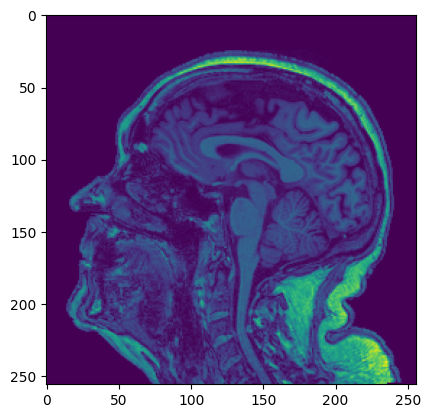

In [ ]:
import numpy as np
import time

def read_sparse_3d_array(file_path):
    with open(file_path, "rb") as f:
        # Read the dimensions of the array
        dim_x = int.from_bytes(f.read(2), byteorder='little', signed=False)
        dim_y = int.from_bytes(f.read(2), byteorder='little', signed=False)
        dim_z = int.from_bytes(f.read(2), byteorder='little', signed=False)
        scan = np.zeros((dim_x, dim_y, dim_z), dtype=np.uint8)

        for y in range(dim_y):
            for z in range(dim_z):
                # Read the start position and length of the non-zero subset
                start_x = int.from_bytes(f.read(2), byteorder='little', signed=False)
                length = int.from_bytes(f.read(2), byteorder='little', signed=False)
                if length ==0: continue

                non_zero_values = np.frombuffer(f.read(length), dtype=np.uint8)
                if len(non_zero_values) != length:
                    continue

                # Save to array as transpose
                scan[y, start_x:start_x + length, z] = non_zero_values
        
    return scan

file_path = "../../Data/Temp/test.nii2"  # Replace with the path to your binary file


start_time = time.time()  # Start the timer
scan_array = read_sparse_3d_array(file_path)
end_time = time.time()  # End the timer

# Print the elapsed time
elapsed_time = end_time - start_time
print(f"Time to read file: {elapsed_time:.6f} seconds")
from matplotlib import pyplot as plt
plt.imshow(scan_array[:,:,85])


In [65]:

import nibabel as nib
import glob
nii_files = glob.glob("../../Data/Temp/ADNI/**/*.nii", recursive=True)



start_time = time.time()  # Start the timer
img_ = nib.load(nii_files[0]).get_fdata()
end_time = time.time()  # End the timer

# Print the elapsed time
elapsed_time = end_time - start_time
print(f"Time to read file: {elapsed_time:.6f} seconds")


Time to read file: 0.069061 seconds
